=== 接続DB名 ===
cit-db-2025-game.db

キャラID | キャラ名 | プレイヤー名 | 体力 | 魔力 | 経験値
------------------------------------------------------------
0 | doraemon | geUBx UrQun | 50 | 51 | 5
1 | akinator | PGzpf jdMhb | 17 | 100 | 93
2 | bikkuriko | npEla bvAMV | 84 | 74 | 23
3 | doraemon | BYRSx HIInE | 29 | 82 | 46
4 | doraemon | PGzpf jdMhb | 5 | 76 | 23
5 | doraemon | pgEtm LdsdL | 71 | 92 | 94
6 | doraemon | VtFck sSphD | 7 | 72 | 74
7 | doraemon | rsQPJ MSyMZ | 3 | 57 | 42
8 | doraemon | JcXip tNsgr | 4 | 16 | 36
9 | bikkuriko | MfejV taAPF | 95 | 81 | 94

CSV保存完了 → join_character_player.csv


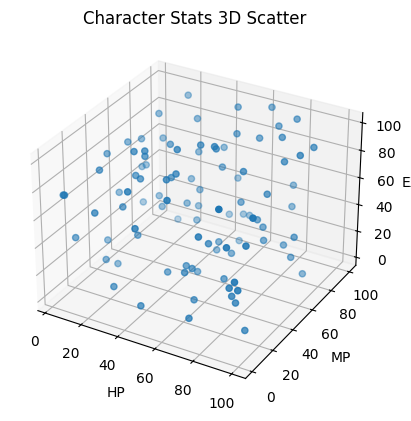

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sqlite3
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

DB_NAME = 'cit-db-2025-game.db'
OUTPUT_CSV = 'join_character_player.csv'

conn = sqlite3.connect(DB_NAME)
cur = conn.cursor()

# ===== 接続DB名表示 =====
print("=== 接続DB名 ===")
print(DB_NAME)
print()

# ===== JOINクエリ =====
cur.execute("""
SELECT
    c.character_id AS キャラID,
    c.character_name AS キャラ名,
    p.fname || ' ' || p.lname AS プレイヤー名,
    c.HP AS 体力,
    c.MP AS 魔力,
    c.EXP AS 経験値
FROM character AS c
JOIN player AS p
ON c.player_id = p.player_id
LIMIT 10;
""")

rows = cur.fetchall()
headers = [desc[0] for desc in cur.description]

# ===== 表示 =====
print(" | ".join(headers))
print("-" * 60)
for row in rows:
    print(" | ".join(map(str, row)))

# ===== CSV保存 =====
with open(OUTPUT_CSV, 'w', newline='', encoding='utf-8-sig') as f:
    writer = csv.writer(f)
    writer.writerow(headers)  # 日本語ヘッダ
    writer.writerows(rows)

print(f"\nCSV保存完了 → {OUTPUT_CSV}")

# ===== HP/MP/EXP 3D プロット =====
cur.execute("SELECT HP, MP, EXP FROM character;")
stats = cur.fetchall()

HPs  = [s[0] for s in stats]
MPs  = [s[1] for s in stats]
EXPs = [s[2] for s in stats]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(HPs, MPs, EXPs)
ax.set_xlabel("HP")
ax.set_ylabel("MP")
ax.set_zlabel("EXP")
ax.set_title("Character Stats 3D Scatter")
plt.show()

cur.close()
conn.close()
